In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

<Axes: >

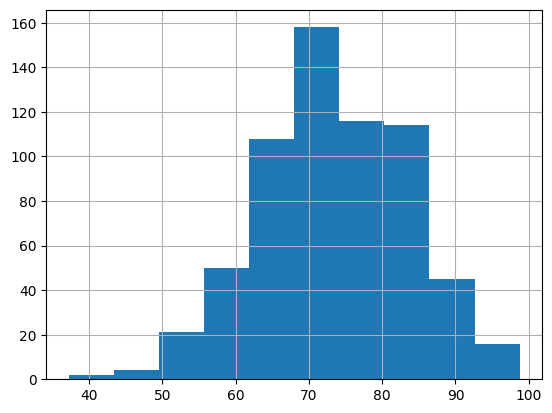

In [3]:
education_districtwise['OVERALL_LI'].hist()

In [4]:
# 'OVERALL_LI' sütunundaki değerlerin ortalamasını hesaplıyoruz
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

np.float64(73.39518927444796)

In [6]:
# 'OVERALL_LI' sütununun standart sapmasını hesaplıyoruz
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

In [7]:
# OVERALL_LI sütunundaki değerlerin, ortalama ± 1 standart sapma aralığında olup olmadığını kontrol ediyoruz
# Bu aralıktaki değerlerin oranını (yüzdesini) hesaplıyoruz

lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.6640378548895899)

In [8]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9542586750788643)

In [9]:
# OVERALL_LI değerlerinin ortalama ± 2 standart sapma aralığında olma oranını hesaplıyoruz

lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9968454258675079)

In [10]:
# OVERALL_LI sütununa ait z-skorlarını hesaplayıp yeni bir 'Z_SCORE' sütunu olarak ekliyoruz

education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [11]:
# Z skoru 3'ten büyük veya -3'ten küçük olan uç değerleri (outlier) filtreliyoruz

education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076
